# Keras Practice - MNIST Classification Using Feedforward ANN

Reimplementing the Neural Network built in EECE 571M for classifying the MNIST Dataset.

Feedforward Neural Network with a single hidden layer consisting of 1000 Neurons. Weights are updated via backpropagation using the Cross Entropy loss and Stochastic Gradient Descent with Momentum.

In [1]:
# Imports
%matplotlib inline
import random
import tensorflow.keras.utils
import tensorflow.keras.models as models
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import numpy as np

In [2]:
def loadData():
    with np.load('C:/Users/aksha/Documents/Jupyter Notebooks/radioml-classification/Datasets/Sample/notMNIST.npz') as data:
        Data, Target = data['images'], data['labels']
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data = Data[randIndx]/255.0
        Target = Target[randIndx]
        trainData, trainTarget = Data[:15000], Target[:15000]
        validData, validTarget = Data[15000:16000], Target[15000:16000]
        testData, testTarget = Data[16000:], Target[16000:]
       
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [3]:
def convertOneHot(trainTarget, validTarget, testTarget):
    trainTargetOneHot = np.zeros([trainTarget.shape[0],10])
    trainTargetOneHot[np.arange(trainTarget.size),trainTarget]=1
    
    validTargetOneHot = np.zeros([validTarget.shape[0],10])
    validTargetOneHot[np.arange(validTarget.size),validTarget] = 1
    
    testTargetOneHot = np.zeros([testTarget.shape[0],10])
    testTargetOneHot[np.arange(testTarget.size),testTarget]=1
    
    return trainTargetOneHot, validTargetOneHot, testTargetOneHot

In [4]:
# Load Data
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

trainData = trainData.reshape(trainData.shape[0],-1)
validData = validData.reshape(validData.shape[0],-1)
testData = testData.reshape(testData.shape[0],-1)

trainTargetOneHot, validTargetOneHot, testTargetOneHot = convertOneHot(trainTarget, validTarget, testTarget)

In [5]:
# Construct Network
model = models.Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='glorot_uniform', name='Hidden_Layer'))
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform', name='Output_Layer'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.00001, momentum=0.9, nesterov=False),metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer (Dense)         (None, 1000)              785000    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train Model
history = model.fit(trainData, trainTargetOneHot, batch_size=32, epochs=200, verbose=2, validation_data=(validData,validTargetOneHot))

Train on 15000 samples, validate on 1000 samples
Epoch 1/200
15000/15000 - 2s - loss: 2.2809 - categorical_accuracy: 0.1686 - val_loss: 2.1721 - val_categorical_accuracy: 0.2450
Epoch 2/200
15000/15000 - 1s - loss: 2.0742 - categorical_accuracy: 0.3155 - val_loss: 1.9904 - val_categorical_accuracy: 0.3960
Epoch 3/200
15000/15000 - 1s - loss: 1.9094 - categorical_accuracy: 0.4638 - val_loss: 1.8368 - val_categorical_accuracy: 0.5530
Epoch 4/200
15000/15000 - 1s - loss: 1.7661 - categorical_accuracy: 0.5784 - val_loss: 1.7024 - val_categorical_accuracy: 0.6280
Epoch 5/200
15000/15000 - 1s - loss: 1.6406 - categorical_accuracy: 0.6558 - val_loss: 1.5857 - val_categorical_accuracy: 0.6870
Epoch 6/200
15000/15000 - 1s - loss: 1.5308 - categorical_accuracy: 0.7171 - val_loss: 1.4834 - val_categorical_accuracy: 0.7340
Epoch 7/200
15000/15000 - 1s - loss: 1.4349 - categorical_accuracy: 0.7605 - val_loss: 1.3939 - val_categorical_accuracy: 0.7710
Epoch 8/200
15000/15000 - 1s - loss: 1.3510 - ca

Epoch 64/200
15000/15000 - 1s - loss: 0.5374 - categorical_accuracy: 0.8731 - val_loss: 0.5349 - val_categorical_accuracy: 0.8740
Epoch 65/200
15000/15000 - 1s - loss: 0.5350 - categorical_accuracy: 0.8733 - val_loss: 0.5324 - val_categorical_accuracy: 0.8740
Epoch 66/200
15000/15000 - 1s - loss: 0.5327 - categorical_accuracy: 0.8735 - val_loss: 0.5301 - val_categorical_accuracy: 0.8730
Epoch 67/200
15000/15000 - 1s - loss: 0.5304 - categorical_accuracy: 0.8733 - val_loss: 0.5278 - val_categorical_accuracy: 0.8730
Epoch 68/200
15000/15000 - 1s - loss: 0.5282 - categorical_accuracy: 0.8737 - val_loss: 0.5255 - val_categorical_accuracy: 0.8730
Epoch 69/200
15000/15000 - 1s - loss: 0.5261 - categorical_accuracy: 0.8740 - val_loss: 0.5233 - val_categorical_accuracy: 0.8720
Epoch 70/200
15000/15000 - 1s - loss: 0.5240 - categorical_accuracy: 0.8743 - val_loss: 0.5213 - val_categorical_accuracy: 0.8740
Epoch 71/200
15000/15000 - 1s - loss: 0.5219 - categorical_accuracy: 0.8748 - val_loss: 0.

Epoch 127/200
15000/15000 - 1s - loss: 0.4544 - categorical_accuracy: 0.8837 - val_loss: 0.4505 - val_categorical_accuracy: 0.8820
Epoch 128/200
15000/15000 - 1s - loss: 0.4537 - categorical_accuracy: 0.8835 - val_loss: 0.4497 - val_categorical_accuracy: 0.8820
Epoch 129/200
15000/15000 - 1s - loss: 0.4530 - categorical_accuracy: 0.8837 - val_loss: 0.4490 - val_categorical_accuracy: 0.8820
Epoch 130/200
15000/15000 - 1s - loss: 0.4522 - categorical_accuracy: 0.8835 - val_loss: 0.4482 - val_categorical_accuracy: 0.8820
Epoch 131/200
15000/15000 - 1s - loss: 0.4515 - categorical_accuracy: 0.8837 - val_loss: 0.4474 - val_categorical_accuracy: 0.8820
Epoch 132/200
15000/15000 - 1s - loss: 0.4508 - categorical_accuracy: 0.8842 - val_loss: 0.4468 - val_categorical_accuracy: 0.8820
Epoch 133/200
15000/15000 - 1s - loss: 0.4501 - categorical_accuracy: 0.8841 - val_loss: 0.4461 - val_categorical_accuracy: 0.8820
Epoch 134/200
15000/15000 - 1s - loss: 0.4494 - categorical_accuracy: 0.8841 - val_

Epoch 190/200
15000/15000 - 1s - loss: 0.4198 - categorical_accuracy: 0.8900 - val_loss: 0.4156 - val_categorical_accuracy: 0.8900
Epoch 191/200
15000/15000 - 1s - loss: 0.4194 - categorical_accuracy: 0.8902 - val_loss: 0.4152 - val_categorical_accuracy: 0.8900
Epoch 192/200
15000/15000 - 1s - loss: 0.4190 - categorical_accuracy: 0.8905 - val_loss: 0.4148 - val_categorical_accuracy: 0.8900
Epoch 193/200
15000/15000 - 1s - loss: 0.4186 - categorical_accuracy: 0.8906 - val_loss: 0.4144 - val_categorical_accuracy: 0.8900
Epoch 194/200
15000/15000 - 1s - loss: 0.4182 - categorical_accuracy: 0.8905 - val_loss: 0.4140 - val_categorical_accuracy: 0.8900
Epoch 195/200
15000/15000 - 1s - loss: 0.4178 - categorical_accuracy: 0.8909 - val_loss: 0.4136 - val_categorical_accuracy: 0.8900
Epoch 196/200
15000/15000 - 1s - loss: 0.4174 - categorical_accuracy: 0.8909 - val_loss: 0.4132 - val_categorical_accuracy: 0.8900
Epoch 197/200
15000/15000 - 1s - loss: 0.4170 - categorical_accuracy: 0.8909 - val_

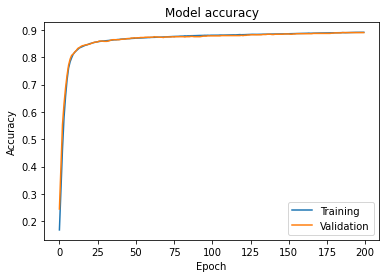

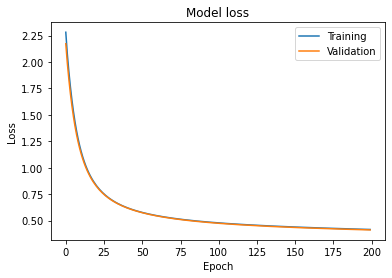

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [8]:
print(trainData.shape)
print(trainTargetOneHot.shape)

print(validData.shape)
print(validTargetOneHot.shape)

print(testData.shape)
print(testTargetOneHot.shape)

(15000, 784)
(15000, 10)
(1000, 784)
(1000, 10)
(2724, 784)
(2724, 10)


In [12]:
# Test Data Evaluation
results = model.evaluate(testData,testTargetOneHot)

2724/2724 [==============================] - 0s 67us/sample - loss: 0.4392 - categorical_accuracy: 0.8884
